# 线性回归预测房价

**任务:**
基于usa_housing_price.csv数据，建立线性回归模型，预测合理房价：
1、以面积为输入变量，建立单因子模型，评估模型表现，可视化线性回归预测结果
2、以income、house age、numbers of rooms、population、area为输入变量，建立多因子模型，评估模型表现
3、预测Income=65000, House Age=5, Number of Rooms=5, Population=30000,size=200的合理房价
X_test = [65000,5,5,30000,200]

In [1]:
#load the data
import pandas as pd
import numpy as np
data = pd.read_csv('usa_housing_price.csv')
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,size,Price
0,79545.45857,5.317139,7.009188,23086.80050,188.214212,1.059034e+06
1,79248.64245,4.997100,6.730821,40173.07217,160.042526,1.505891e+06
2,61287.06718,5.134110,8.512727,36882.15940,227.273544,1.058988e+06
3,63345.24005,3.811764,5.586729,34310.24283,164.816630,1.260617e+06
4,59982.19723,5.959445,7.839388,26354.10947,161.966659,6.309435e+05


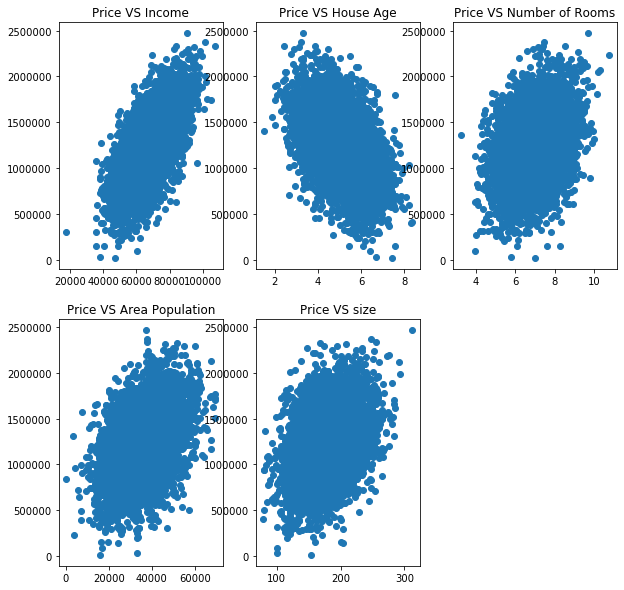

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10,10))
fig1 =plt.subplot(231)
plt.scatter(data.loc[:,'Avg. Area Income'],data.loc[:,'Price'])
plt.title('Price VS Income')

fig2 =plt.subplot(232)
plt.scatter(data.loc[:,'Avg. Area House Age'],data.loc[:,'Price'])
plt.title('Price VS House Age')

fig3 =plt.subplot(233)
plt.scatter(data.loc[:,'Avg. Area Number of Rooms'],data.loc[:,'Price'])
plt.title('Price VS Number of Rooms')

fig4 =plt.subplot(234)
plt.scatter(data.loc[:,'Area Population'],data.loc[:,'Price'])
plt.title('Price VS Area Population')

fig5 =plt.subplot(235)
plt.scatter(data.loc[:,'size'],data.loc[:,'Price'])
plt.title('Price VS size')
plt.show()

In [3]:
#define X and y
X = data.loc[:,'size']
y = data.loc[:,'Price']
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [4]:
X = np.array(X).reshape(-1,1)
print(X.shape)

(5000, 1)


In [5]:
#set up the linear regression model
from sklearn.linear_model import LinearRegression
LR1 = LinearRegression()
#train the model
LR1.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
#calculate the price vs size
y_predict_1 = LR1.predict(X)
print(y_predict_1)

[1276881.85636623 1173363.58767144 1420407.32457443 ... 1097848.86467426
 1264502.88144558 1131278.58816273]


In [7]:
#evaluate the model
from sklearn.metrics import mean_squared_error,r2_score
mean_squared_error_1 = mean_squared_error(y,y_predict_1)
r2_score_1 = r2_score(y,y_predict_1)
print(mean_squared_error_1,r2_score_1)

108771672553.6264 0.1275031240418234


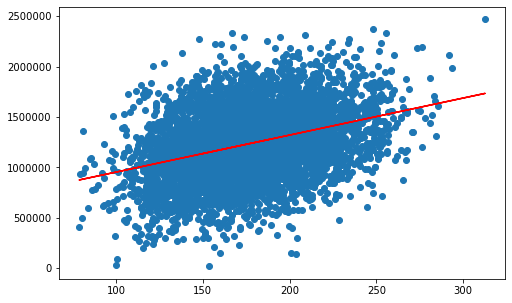

In [8]:
fig6 = plt.figure(figsize=(8,5))
plt.scatter(X,y)
plt.plot(X,y_predict_1,'r')
plt.show()

In [9]:
#define X_multi
X_multi = data.drop(['Price'],axis=1)
X_multi

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,size
0,79545.45857,5.317139,7.009188,23086.80050,188.214212
1,79248.64245,4.997100,6.730821,40173.07217,160.042526
2,61287.06718,5.134110,8.512727,36882.15940,227.273544
3,63345.24005,3.811764,5.586729,34310.24283,164.816630
4,59982.19723,5.959445,7.839388,26354.10947,161.966659
...,...,...,...,...,...
4995,60567.94414,3.169638,6.137356,22837.36103,161.641403
4996,78491.27543,4.000865,6.576763,25616.11549,159.164596
4997,63390.68689,3.749409,4.805081,33266.14549,139.491785
4998,68001.33124,5.465612,7.130144,42625.62016,184.845371


In [10]:
#set up 2nd linear model
LR_multi = LinearRegression()
#train the model
LR_multi.fit(X_multi,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
#make prediction
y_predict_multi = LR_multi.predict(X_multi)
print(y_predict_multi)

[1223968.89166086 1497306.3318863  1250884.31019437 ... 1020693.92390376
 1260503.36914585 1302737.7915763 ]


In [12]:
mean_squared_error_multi = mean_squared_error(y,y_predict_multi)
r2_score_multi = r2_score(y,y_predict_multi)
print(mean_squared_error_multi,r2_score_multi)

10219846512.17786 0.9180229195220739


In [13]:
print(mean_squared_error_1)

108771672553.6264


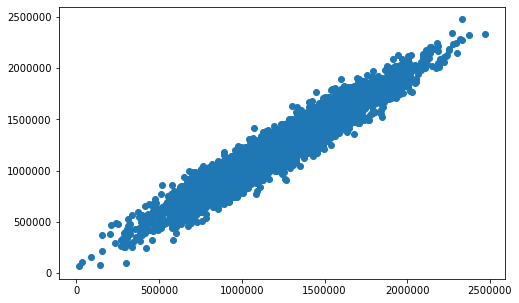

In [14]:
fig7 = plt.figure(figsize=(8,5))
plt.scatter(y,y_predict_multi)
plt.show()

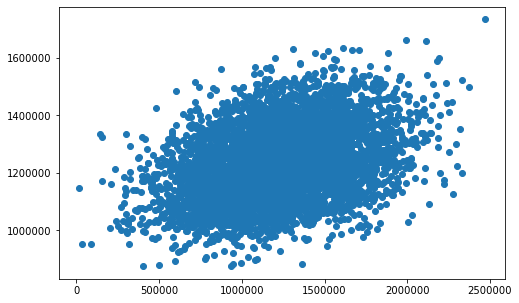

In [15]:
fig8 = plt.figure(figsize=(8,5))
plt.scatter(y,y_predict_1)
plt.show()

In [16]:
X_test = [65000,5,5,30000,200]
X_test = np.array(X_test).reshape(1,-1)
print(X_test)

[[65000     5     5 30000   200]]


In [17]:
y_test_predict = LR_multi.predict(X_test)
print(y_test_predict)

[817052.19516298]
